In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [1]:
import pandas as pd

# Load the synthetic data from the CSV file
df = pd.read_csv('house_data.csv')

# Display the first few rows of the dataset to verify it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Location  Land_Area  Floor_Area  Number_of_Floors  Number_of_Bedrooms  \
0    Rural    1699.02     1121.59                 1                   2   
1    Urban    4006.42     3398.08                 1                   6   
2    Rural    1268.53      816.51                 2                   1   
3    Rural    3807.48     2817.92                 1                   5   
4    Urban    1400.77      766.53                 4                   1   

   Number_of_Bathrooms     House_Type  Year_Built  Condition  \
0                    1  Single-Family        2017       Good   
1                    4   Multi-Family        1979  Renovated   
2                    1      Apartment        1962        Old   
3                    2      Apartment        1964        Old   
4                    1  Single-Family        1969        Old   

   Parking_Availability  Proximity_to_City_Center       Price  
0                     1                     49.73  1270563.04  
1      

In [2]:
# Display dataset information to check for data types, non-null counts, etc.
print("\nDataset information:")
print(df.info())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  5000 non-null   object 
 1   Land_Area                 5000 non-null   float64
 2   Floor_Area                5000 non-null   float64
 3   Number_of_Floors          5000 non-null   int64  
 4   Number_of_Bedrooms        5000 non-null   int64  
 5   Number_of_Bathrooms       5000 non-null   int64  
 6   House_Type                5000 non-null   object 
 7   Year_Built                5000 non-null   int64  
 8   Condition                 5000 non-null   object 
 9   Parking_Availability      5000 non-null   int64  
 10  Proximity_to_City_Center  5000 non-null   float64
 11  Price                     5000 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 468.9+ KB
None


In [3]:
df

,Location,Land_Area,Floor_Area,Number_of_Floors,Number_of_Bedrooms,Number_of_Bathrooms,House_Type,Year_Built,Condition,Parking_Availability,Proximity_to_City_Center,Price
0,Rural,1699.02,1121.59,1,2,1,Single-Family,2017,Good,1,49.73,1270563.04
1,Urban,4006.42,3398.08,1,6,4,Multi-Family,1979,Renovated,0,5.89,3336080.09
2,Rural,1268.53,816.51,2,1,1,Apartment,1962,Old,1,56.76,1051620.71
3,Rural,3807.48,2817.92,1,5,2,Apartment,1964,Old,1,59.05,2922984.68
4,Urban,1400.77,766.53,4,1,1,Single-Family,1969,Old,0,9.87,1208042.55
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Urban,2295.40,1174.42,3,2,1,Multi-Family,1966,Old,1,5.21,1661187.84
4996,Suburban,2295.10,1168.76,2,2,2,Single-Family,2022,New,0,23.79,1731250.11
4997,Rural,3182.53,2248.79,2,4,2,Apartment,1996,Renovated,1,57.83,2455831.66
4998,Suburban,2353.51,1632.63,2,3,1,Multi-Family,2005,Good,0,19.90,1912738.73


In [4]:
df.shape

(5000, 12)

In [5]:
df.describe()

,Land_Area,Floor_Area,Number_of_Floors,Number_of_Bedrooms,Number_of_Bathrooms,Year_Built,Parking_Availability,Proximity_to_City_Center,Price
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2509.667884,1756.854716,1.87360,3.055600,1.844600,1986.751800,0.696400,22.903890,2.006443e+06
std,985.819417,756.356293,0.92401,1.475583,0.829571,21.291925,0.459858,17.735226,7.322714e+05
min,7.640000,6.540000,1.00000,1.000000,1.000000,1950.000000,0.000000,0.000000,1.084209e+05
25%,1828.755000,1228.312500,1.00000,2.000000,1.000000,1969.000000,0.000000,7.030000,1.496615e+06
50%,2506.490000,1700.265000,2.00000,3.000000,2.000000,1987.000000,1.000000,19.050000,1.989011e+06
75%,3191.125000,2241.805000,2.00000,4.000000,2.000000,2005.000000,1.000000,36.875000,2.515071e+06
max,6552.550000,5361.820000,4.00000,10.000000,5.000000,2023.000000,1.000000,59.990000,5.125335e+06


**PREPROCESSING**

1.LOCATION

In [6]:
# Show unique values in the 'Location' column before conversion
print("Unique values in 'Location' before conversion:")
print(df['Location'].unique())

# Convert 'Location' from categorical to numeric using Label Encoding
df['Location'] = df['Location'].astype('category').cat.codes.astype(float)

# Show unique values in the 'Location' column after conversion
print("\nUnique values in 'Location' after conversion:")
print(df['Location'].unique())

# Verify the data types
print("\nData types after conversion:")
print(df.dtypes)

Unique values in 'Location' before conversion:
['Rural' 'Urban' 'Suburban']

Unique values in 'Location' after conversion:
[0. 2. 1.]

Data types after conversion:
Location                    float64
Land_Area                   float64
Floor_Area                  float64
Number_of_Floors              int64
Number_of_Bedrooms            int64
Number_of_Bathrooms           int64
House_Type                   object
Year_Built                    int64
Condition                    object
Parking_Availability          int64
Proximity_to_City_Center    float64
Price                       float64
dtype: object


In [7]:
# Convert 'Number_of_Floors', 'Number_of_Bedrooms', and 'Number_of_Bathrooms' to float
df['Number_of_Floors'] = df['Number_of_Floors'].astype(float)
df['Number_of_Bedrooms'] = df['Number_of_Bedrooms'].astype(float)
df['Number_of_Bathrooms'] = df['Number_of_Bathrooms'].astype(float)
df['Year_Built'] = df['Year_Built'].astype(float)
df['Parking_Availability'] = df['Parking_Availability'].astype(float)

# Verify the conversion by checking the data types
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Location                    float64
Land_Area                   float64
Floor_Area                  float64
Number_of_Floors            float64
Number_of_Bedrooms          float64
Number_of_Bathrooms         float64
House_Type                   object
Year_Built                  float64
Condition                    object
Parking_Availability        float64
Proximity_to_City_Center    float64
Price                       float64
dtype: object


2.HOUSE_TYPE

In [8]:
# Show unique values in the 'Location' column before conversion
print("Unique values in 'House Type' before conversion:")
print(df['House_Type'].unique())

Unique values in 'House Type' before conversion:
['Single-Family' 'Multi-Family' 'Apartment']


In [9]:
# Convert 'House_Type' from categorical to numeric using Label Encoding
df['House_Type'] = df['House_Type'].astype('category').cat.codes.astype(float)

# Show unique values in 'House_Type' after conversion
print("\nUnique values in 'House_Type' after conversion:")
print(df['House_Type'].unique())

# Verify the data types
print("\nData types after conversion:")
print(df.dtypes)


Unique values in 'House_Type' after conversion:
[2. 1. 0.]

Data types after conversion:
Location                    float64
Land_Area                   float64
Floor_Area                  float64
Number_of_Floors            float64
Number_of_Bedrooms          float64
Number_of_Bathrooms         float64
House_Type                  float64
Year_Built                  float64
Condition                    object
Parking_Availability        float64
Proximity_to_City_Center    float64
Price                       float64
dtype: object


3.CONDITION

In [11]:
# Show unique values in the 'Location' column before conversion
print("Unique values in 'Condition' before conversion:")
print(df['Condition'].unique())

Unique values in 'Condition' before conversion:
['Good' 'Renovated' 'Old' 'New']


In [12]:
# Convert 'Condition' from categorical to numeric using Label Encoding
df['Condition'] = df['Condition'].astype('category').cat.codes.astype(float)

# Show unique values in 'Condition' after conversion
print("\nUnique values in 'Condition' after conversion:")
print(df['Condition'].unique())

# Verify the data types
print("\nData types after conversion:")
print(df.dtypes)

# Display the first few rows to confirm the changes
print("\nFirst 5 rows after conversion:")
print(df.head())


Unique values in 'Condition' after conversion:
[0. 3. 2. 1.]

Data types after conversion:
Location                    float64
Land_Area                   float64
Floor_Area                  float64
Number_of_Floors            float64
Number_of_Bedrooms          float64
Number_of_Bathrooms         float64
House_Type                  float64
Year_Built                  float64
Condition                   float64
Parking_Availability        float64
Proximity_to_City_Center    float64
Price                       float64
dtype: object

First 5 rows after conversion:
   Location  Land_Area  Floor_Area  Number_of_Floors  Number_of_Bedrooms  \
0       0.0    1699.02     1121.59               1.0                 2.0   
1       2.0    4006.42     3398.08               1.0                 6.0   
2       0.0    1268.53      816.51               2.0                 1.0   
3       0.0    3807.48     2817.92               1.0                 5.0   
4       2.0    1400.77      766.53               4

In [13]:
df.describe()

,Location,Land_Area,Floor_Area,Number_of_Floors,Number_of_Bedrooms,Number_of_Bathrooms,House_Type,Year_Built,Condition,Parking_Availability,Proximity_to_City_Center,Price
count,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,1.02320,2509.667884,1756.854716,1.87360,3.055600,1.844600,0.980000,1986.751800,1.948000,0.696400,22.903890,2.006443e+06
std,0.81951,985.819417,756.356293,0.92401,1.475583,0.829571,0.814207,21.291925,1.131526,0.459858,17.735226,7.322714e+05
min,0.00000,7.640000,6.540000,1.00000,1.000000,1.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,1.084209e+05
25%,0.00000,1828.755000,1228.312500,1.00000,2.000000,1.000000,0.000000,1969.000000,1.000000,0.000000,7.030000,1.496615e+06
50%,1.00000,2506.490000,1700.265000,2.00000,3.000000,2.000000,1.000000,1987.000000,2.000000,1.000000,19.050000,1.989011e+06
75%,2.00000,3191.125000,2241.805000,2.00000,4.000000,2.000000,2.000000,2005.000000,3.000000,1.000000,36.875000,2.515071e+06
max,2.00000,6552.550000,5361.820000,4.00000,10.000000,5.000000,2.000000,2023.000000,3.000000,1.000000,59.990000,5.125335e+06


**Correlation between features of the dataset**


<Axes: >

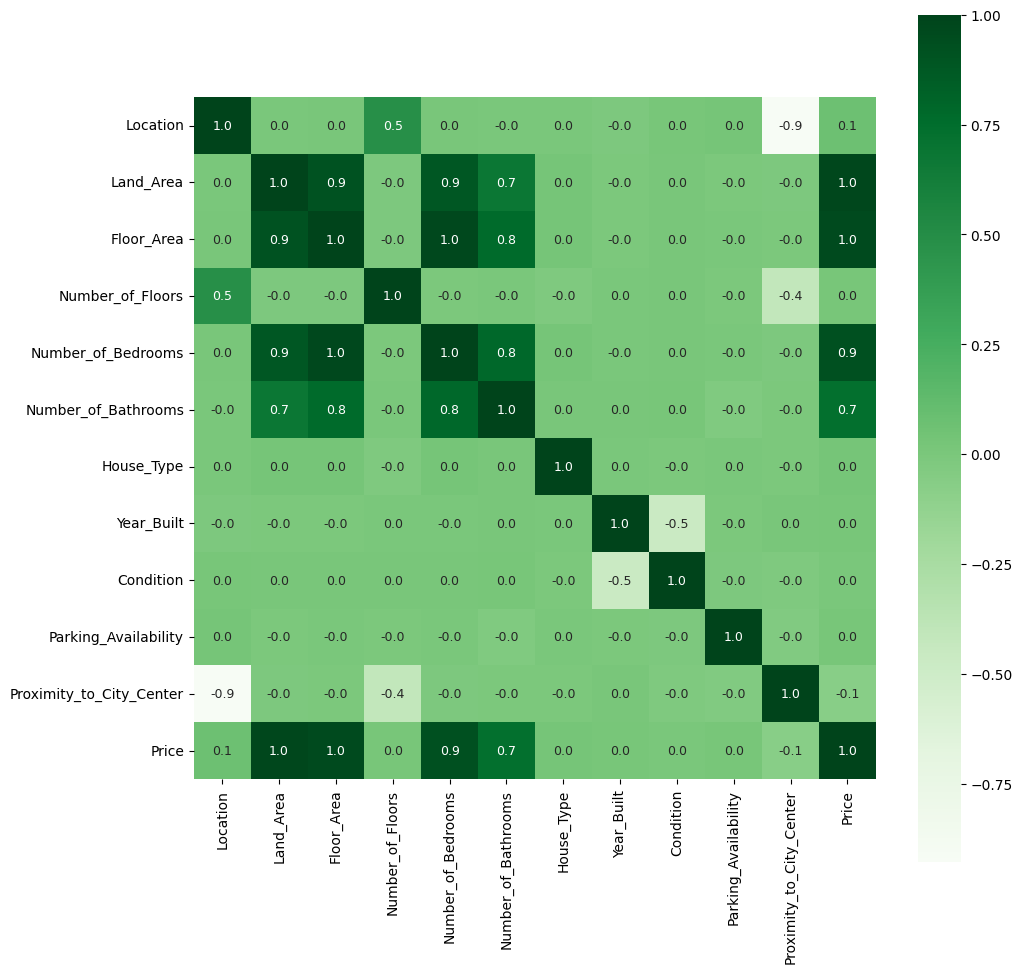

In [17]:
from numpy.ma.core import size

cor= df.corr()

#check correlation using a heatmap
plt.figure(figsize=(11,11))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Greens')


In [20]:
import pandas as pd

# Assuming df is your DataFrame
cor = df.corr()

# Display the correlation matrix as a DataFrame (table format)
print("Correlation Matrix:")
print(cor)

# Alternatively, if you want to save the correlation matrix to a CSV file:
cor.to_csv('correlation_matrix.csv', index=True)

#A VERY HIGH CORRELATION OF PRICE WITH LAND,FLOOR AREA, NO OF BEDRROM AND BATHROOM. THESE FOUR PARAMETERS WILL HIGHLY INFLUENCE THE PRICE PREDICTION

Correlation Matrix:
                          Location  Land_Area  Floor_Area  Number_of_Floors  \
Location                  1.000000   0.004443    0.006374          0.481496   
Land_Area                 0.004443   1.000000    0.911024         -0.015059   
Floor_Area                0.006374   0.911024    1.000000         -0.011563   
Number_of_Floors          0.481496  -0.015059   -0.011563          1.000000   
Number_of_Bedrooms        0.009851   0.881162    0.975569         -0.007609   
Number_of_Bathrooms      -0.000286   0.682835    0.768072         -0.000838   
House_Type                0.003694   0.027837    0.027595         -0.019314   
Year_Built               -0.010584  -0.005015   -0.001998          0.004770   
Condition                 0.015970   0.008840    0.011735          0.009975   
Parking_Availability      0.026656  -0.004540   -0.000545         -0.005591   
Proximity_to_City_Center -0.927447  -0.009380   -0.008026         -0.410666   
Price                     0.0727

array([[<Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'Land_Area'}>,
        <Axes: title={'center': 'Floor_Area'}>],
       [<Axes: title={'center': 'Number_of_Floors'}>,
        <Axes: title={'center': 'Number_of_Bedrooms'}>,
        <Axes: title={'center': 'Number_of_Bathrooms'}>],
       [<Axes: title={'center': 'House_Type'}>,
        <Axes: title={'center': 'Year_Built'}>,
        <Axes: title={'center': 'Condition'}>],
       [<Axes: title={'center': 'Parking_Availability'}>,
        <Axes: title={'center': 'Proximity_to_City_Center'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

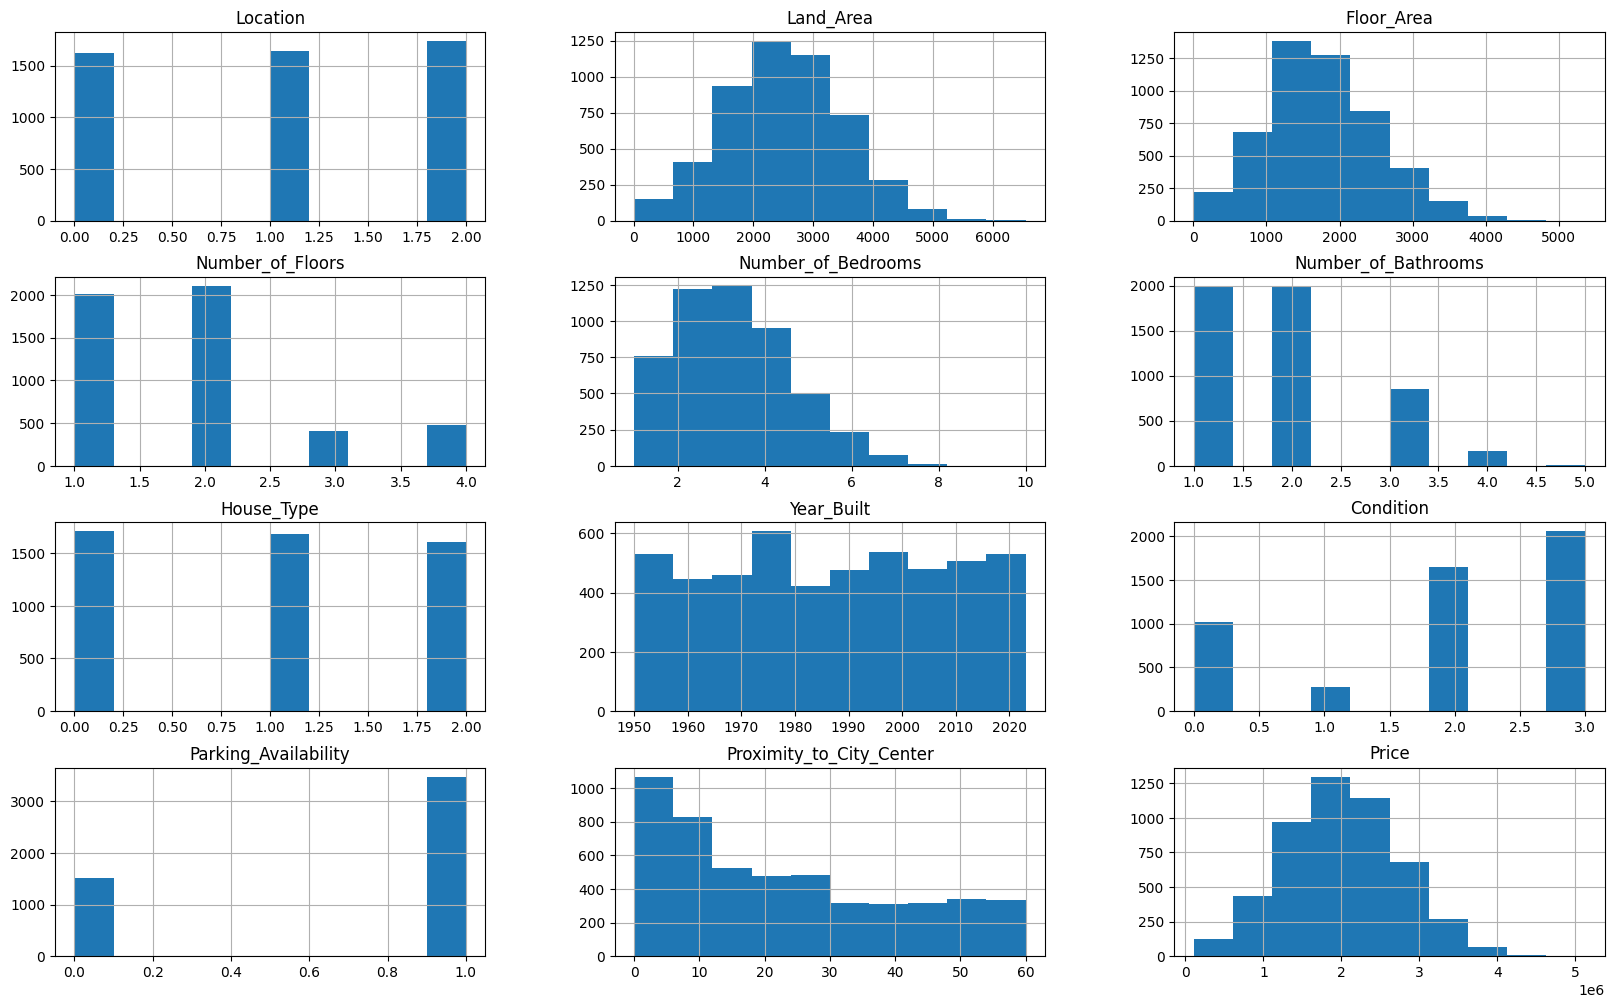

In [22]:
df.hist(figsize=(20,12))

#no skewness in data is observed

**Splitting the data and Target**


In [24]:
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [25]:
X

,Location,Land_Area,Floor_Area,Number_of_Floors,Number_of_Bedrooms,Number_of_Bathrooms,House_Type,Year_Built,Condition,Parking_Availability,Proximity_to_City_Center
0,0.0,1699.02,1121.59,1.0,2.0,1.0,2.0,2017.0,0.0,1.0,49.73
1,2.0,4006.42,3398.08,1.0,6.0,4.0,1.0,1979.0,3.0,0.0,5.89
2,0.0,1268.53,816.51,2.0,1.0,1.0,0.0,1962.0,2.0,1.0,56.76
3,0.0,3807.48,2817.92,1.0,5.0,2.0,0.0,1964.0,2.0,1.0,59.05
4,2.0,1400.77,766.53,4.0,1.0,1.0,2.0,1969.0,2.0,0.0,9.87
...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,2295.40,1174.42,3.0,2.0,1.0,1.0,1966.0,2.0,1.0,5.21
4996,1.0,2295.10,1168.76,2.0,2.0,2.0,2.0,2022.0,1.0,0.0,23.79
4997,0.0,3182.53,2248.79,2.0,4.0,2.0,0.0,1996.0,3.0,1.0,57.83
4998,1.0,2353.51,1632.63,2.0,3.0,1.0,1.0,2005.0,0.0,0.0,19.90


In [26]:
Y

0       1270563.04
1       3336080.09
2       1051620.71
3       2922984.68
4       1208042.55
           ...    
4995    1661187.84
4996    1731250.11
4997    2455831.66
4998    1912738.73
4999    2231560.88
Name: Price, Length: 5000, dtype: float64

In [27]:
#Splitting the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [28]:
print(X.shape, X_train.shape, X_test.shape)


(5000, 11) (4000, 11) (1000, 11)


**STANDARDIZE**

In [30]:
#Standardize 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Linear Regression - MSE: {mse}")
print(f"Linear Regression - R-squared: {r2}")


Linear Regression - MSE: 2539993594.2945514
Linear Regression - R-squared: 0.9952784003410711


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, Y_pred_rf)
rf_r2 = r2_score(Y_test, Y_pred_rf)

print(f"Random Forest - MSE: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")


Random Forest - MSE: 3781998869.19159
Random Forest - R-squared: 0.9929696340136621
